In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import cv2
from keras.layers import *
from keras.models import Model
import os
import glob
import matplotlib.pyplot as plt
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


In [2]:
trainxdir=glob.glob("../input/train/*.png")
trainydir=glob.glob("../input/train_cleaned/*.png")

In [3]:
def loadimg(path):
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(256,128))
    return img

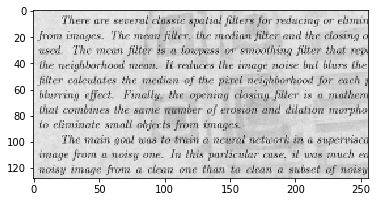

In [4]:
plt.imshow(loadimg(trainxdir[0]))

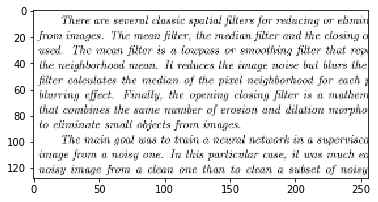

In [5]:
plt.imshow(loadimg(trainydir[0]))

In [6]:
loadimg(trainxdir[2]).shape

(128, 256, 3)

In [7]:
trainxdir[:10]

['../input/train/9.png',
 '../input/train/12.png',
 '../input/train/158.png',
 '../input/train/155.png',
 '../input/train/5.png',
 '../input/train/75.png',
 '../input/train/120.png',
 '../input/train/93.png',
 '../input/train/152.png',
 '../input/train/189.png']

In [8]:
trainydir[:10]

['../input/train_cleaned/9.png',
 '../input/train_cleaned/12.png',
 '../input/train_cleaned/158.png',
 '../input/train_cleaned/155.png',
 '../input/train_cleaned/5.png',
 '../input/train_cleaned/75.png',
 '../input/train_cleaned/120.png',
 '../input/train_cleaned/93.png',
 '../input/train_cleaned/152.png',
 '../input/train_cleaned/189.png']

In [9]:
xtrain=np.array([loadimg(i) for i in trainxdir])
ytrain=np.array([loadimg(i) for i in trainydir])

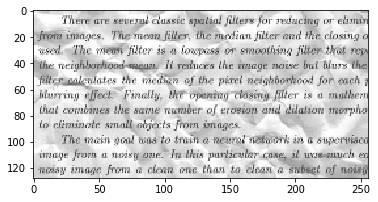

In [10]:
plt.imshow(xtrain[1])

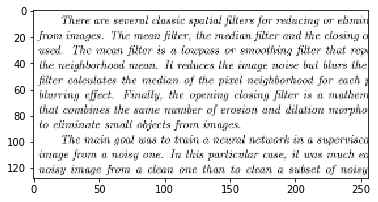

In [11]:
plt.imshow(ytrain[1])

In [12]:
xtrain=xtrain/255
ytrain=ytrain/255

In [13]:
inp=Input((128,256,3))
x1=Conv2D(32,4,strides=(2,2),padding='same')(inp)
x1=BatchNormalization()(x1)
x1=Dropout(0.3)(x1)
x1=Activation('relu')(x1)
x2=Conv2D(32,4,strides=(2,2),padding='same')(x1)
x2=BatchNormalization()(x2)
x2=Dropout(0.3)(x2)
x2=Activation('relu')(x2)
x3=Conv2D(32,4,strides=(2,2),padding='same')(x2)
x3=BatchNormalization()(x3)
x3=Dropout(0.3)(x3)
x3=Activation('relu')(x3)

y3=Conv2DTranspose(32,4,strides=(2,2),padding='same')(x3)
y3=Activation('relu')(y3)

y2=Concatenate()([y3,x2])
y2=Conv2DTranspose(32,4,strides=(2,2),padding='same')(y2)
y2=Activation('relu')(y2)

y1=Concatenate()([y2,x1])
y1=Conv2DTranspose(3,4,strides=(2,2),padding='same')(y1)
y1=Activation('sigmoid')(y1)

model=Model(inp,y1)

In [14]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 128, 32)  1568        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 128, 32)  128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 64, 128, 32)  0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
activation

In [15]:
model.compile(optimizer='adam',loss='mse')

In [16]:
model.fit(xtrain,ytrain,verbose=1,epochs=150,validation_split=0.05,shuffle=True)

Train on 136 samples, validate on 8 samples
Epoch 1/150
136/136 [==============================] - 3s 21ms/step - loss: 0.2006 - val_loss: 0.1359
Epoch 2/150
136/136 [==============================] - 0s 2ms/step - loss: 0.1195 - val_loss: 0.0692
Epoch 3/150
136/136 [==============================] - 0s 2ms/step - loss: 0.0649 - val_loss: 0.0556
Epoch 4/150
136/136 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0518
Epoch 5/150
136/136 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.0502
Epoch 6/150
136/136 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.0465
Epoch 7/150
136/136 [==============================] - 0s 2ms/step - loss: 0.0459 - val_loss: 0.0431
Epoch 8/150
136/136 [==============================] - 0s 2ms/step - loss: 0.0406 - val_loss: 0.0401
Epoch 9/150
136/136 [==============================] - 0s 2ms/step - loss: 0.0366 - val_loss: 0.0393
Epoch 10/150
136/136 [========================

In [17]:
pred=model.predict(xtrain)

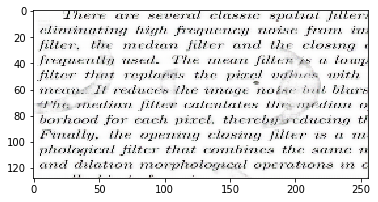

In [18]:
plt.imshow(pred[5])

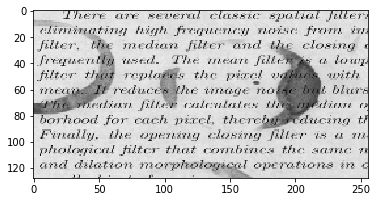

In [19]:
plt.imshow(xtrain[5])

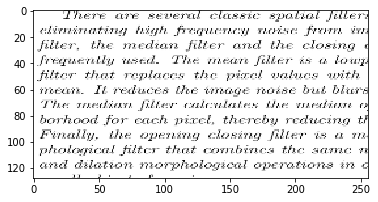

In [20]:
plt.imshow(ytrain[5])

In [21]:
#Test images
testimgdir=glob.glob("../input/test/*.png")

In [22]:
xtest=np.array([loadimg(i) for i in testimgdir])

In [23]:
xtest=xtest/255

In [24]:
testpredictions=model.predict(xtest)

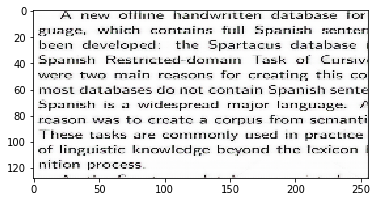

In [25]:
plt.imshow(testpredictions[0])

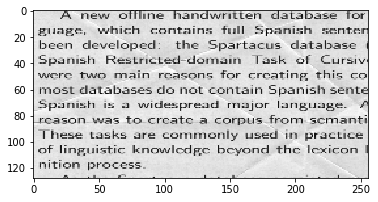

In [26]:
plt.imshow(xtest[0])

In [27]:
len(testpredictions)

72

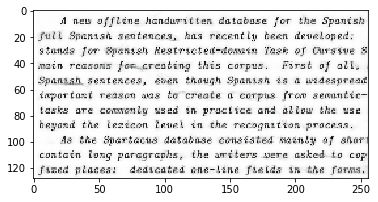

In [28]:
plt.imshow(testpredictions[1])
    

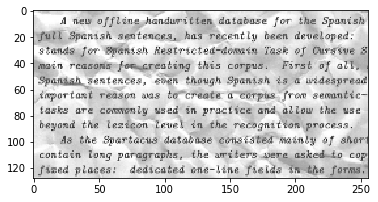

In [29]:
plt.imshow(xtest[1])